# Historical Weather Pull : WeatherBit

In [1]:
''' 
Pupose is to pull the historical weather in a JSON from WeatherBit for each centroid of the county in Iowa for each hour going back 5 years. 
1. Get the centroids of each county in Iowa
2. Get historical weather data for 5 years for county 1, append to dataframe
3. Repeat for each county
4. Export dataframe to CSV
'''

' \nPupose is to pull the historical weather in a JSON from WeatherBit for each centroid of the county in Iowa for each hour going back 5 years. \n1. Get the centroids of each county in Iowa\n2. Get historical weather data for 5 years for county 1, append to dataframe\n3. Repeat for each county\n4. Export dataframe to CSV\n'

In [4]:
#pip3 install geopandas

SyntaxError: invalid syntax (2909631141.py, line 1)

## Iowa Counties Centroids

In [5]:
import pandas as pd
import geopandas as gpd

In [6]:
import os
print(os.getcwd())

c:\Users\goodm\OneDrive - The University of Chicago\Documents\Masters Program\ProjectToto\github\ProjectToto\HistoricalData


   PERIMETER  DOMCountyI   FIPS  Shape_Leng  Shape_Area  FIPS_INT CountyName  \
0   193975.5          60  19119    2.212753    0.169102     19119       Lyon   
1   130929.6          72  19143    1.434543    0.114867     19143    Osceola   
2   131290.5          30  19059    1.438023    0.116176     19059  Dickinson   
3   130956.8          32  19063    1.434046    0.115803     19063      Emmet   
4   172890.3           3  19005    1.847862    0.189376     19005  Allamakee   

  StateAbbr        CountyDisp  \
0        IA       Lyon County   
1        IA    Osceola County   
2        IA  Dickinson County   
3        IA      Emmet County   
4        IA  Allamakee County   

                                            geometry  
0  POLYGON ((-10753368.681 5388440.461, -10753353...  
1  POLYGON ((-10671185.490 5388386.000, -10671183...  
2  POLYGON ((-10618522.148 5388426.616, -10618532...  
3  POLYGON ((-10565862.525 5388522.266, -10565865...  
4  POLYGON ((-10198062.048 5388480.894, -1019

<Axes: >

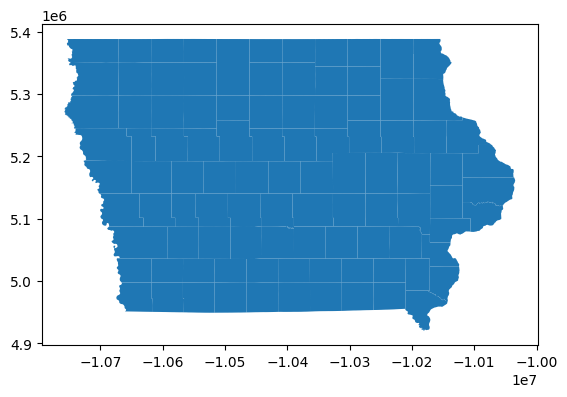

In [8]:
import os
# Load the shapefile
gdf = gpd.read_file('Iowa_County_Boundries/IowaCounties.shp')

# Display the first few rows of the dataframe
print(gdf.head())

# Display the total number of entries
print("Total counties:", len(gdf))

# Optionally, plot the shapefile to visually inspect it
gdf.plot()

In [10]:
## Get Centroids
gdf['centroid'] = gdf.geometry.centroid
gdf['latitude'] = gdf.centroid.y
gdf['longitude'] = gdf.centroid.x

centroid_data = gdf[['CountyName', 'latitude', 'longitude']]

centroid_data.to_csv('Iowa_County_Boundries/Iowa_Counties_Centroid.csv', index=False)